<a href="https://colab.research.google.com/github/reysilvaa/PCVK/blob/main/week4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
# Accessing My Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

## Gamma Correction

 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma: 10


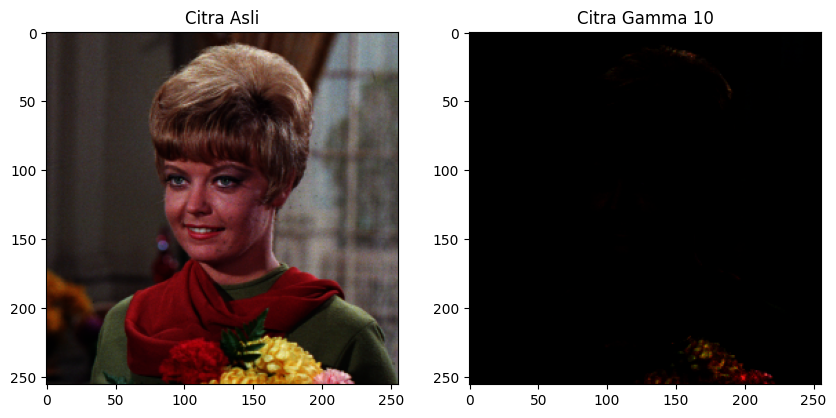

In [5]:
def gamma_correction(image, gamma):
    # Konversi citra ke dalam tipe data float32 untuk akurasi perhitungan
    img_float = image.astype(np.float32)

    # Normalisasi nilai piksel ke rentang [0, 1]
    normalized_img = img_float / 255.0

    # Terapkan transformasi gamma
    corrected_img = 255 * (normalized_img ** gamma)

    # Konversi kembali ke tipe uint8
    corrected_img = np.clip(corrected_img, 0, 255).astype(np.uint8)

    return corrected_img

print(' Gamma Correction pada citra ')
print('----------------------------------')
try:
    gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
    print('Error, not a number')

# Memuat citra menggunakan OpenCV
original = cv.imread('/content/drive/MyDrive/PCVK/Images/Assets/female.tiff')

# Pastikan citra berhasil dibaca
if original is None:
    print("Error: Tidak dapat membaca citra.")
else:
    gamma_corrected_image = gamma_correction(original, gamma)
    final_frame = cv.hconcat([original, gamma_corrected_image])

    # Tampilkan hasil
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.title('Citra Asli')
    plt.imshow(cv.cvtColor(original, cv.COLOR_BGR2RGB))

    plt.subplot(1, 2, 2)
    plt.title(f'Citra Gamma {gamma}')
    plt.imshow(cv.cvtColor(gamma_corrected_image, cv.COLOR_BGR2RGB))

    plt.show()


## Simulasi Image Depth

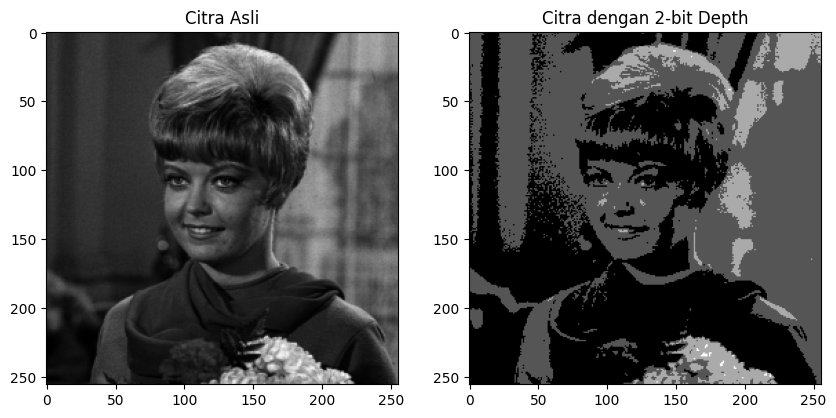

In [6]:
# Tentukan bit depth yang diinginkan
bit_depth = 2
level = 255 / (pow(2, bit_depth) - 1)

# Memuat citra grayscale
original = cv.imread('/content/drive/MyDrive/PCVK/Images/Assets/female.tiff', cv.IMREAD_GRAYSCALE)

# Pastikan citra berhasil dimuat
if original is None:
    print("Error: Tidak dapat membaca citra.")
else:
    # Buat citra dengan bit depth baru
    depth_image = np.zeros(original.shape, original.dtype)

    # Lakukan proses konversi bit depth
    for i in range(original.shape[0]):
        for j in range(original.shape[1]):
            # Proses setiap piksel dengan mengurangi jumlah level intensitas
            depth_image[i, j] = np.round(original[i, j] / level) * level

    # Tampilkan citra asli dan citra yang sudah dikonversi
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.title('Citra Asli')
    plt.imshow(original, cmap='gray')

    plt.subplot(1, 2, 2)
    plt.title(f'Citra dengan {bit_depth}-bit Depth')
    plt.imshow(depth_image, cmap='gray')

    plt.show()


## Average Denoising

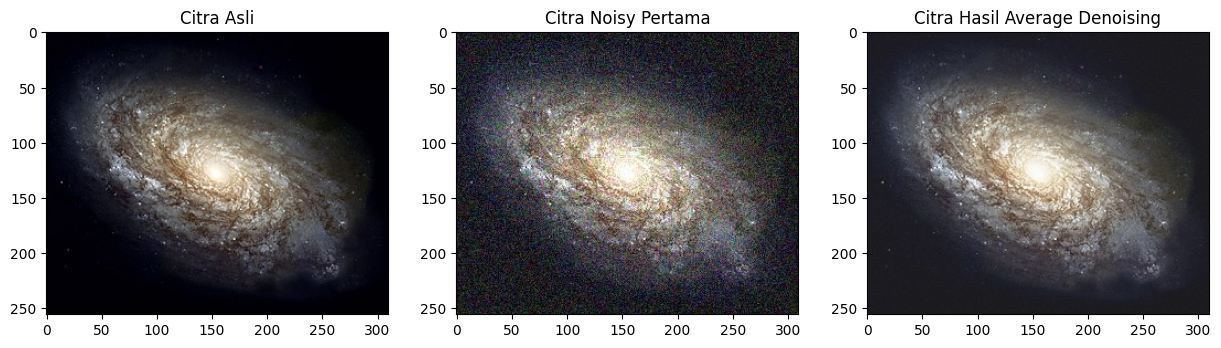

In [8]:
import glob

# Membaca citra asli
original = cv.imread('/content/drive/MyDrive/PCVK/Images/Assets/galaxy.jpg')

# Memuat semua citra dengan Gaussian Noise dari folder
noisy_images = []
for img_path in glob.glob('/content/drive/MyDrive/PCVK/Images/Assets/noises/*.jpg'):
    noisy_image = cv.imread(img_path)
    noisy_images.append(noisy_image)

# Pastikan semua citra berhasil dimuat
if len(noisy_images) == 0:
    print("Error: Tidak ada citra noise yang berhasil dimuat.")
else:
    # Inisialisasi matriks akumulasi untuk menampung hasil penjumlahan citra noise
    avg_image = np.zeros_like(noisy_images[0], dtype=np.float32)

    # Menggabungkan semua citra dengan Gaussian Noise menggunakan metode rata-rata
    for img in noisy_images:
        avg_image += img.astype(np.float32)

    # Hitung rata-rata dari semua citra noise
    avg_image /= len(noisy_images)

    # Konversi kembali ke tipe uint8
    avg_image = np.clip(avg_image, 0, 255).astype(np.uint8)

    # Tampilkan citra asli, citra noise pertama, dan citra hasil denoising
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.title('Citra Asli')
    plt.imshow(cv.cvtColor(original, cv.COLOR_BGR2RGB))

    plt.subplot(1, 3, 2)
    plt.title('Citra Noisy Pertama')
    plt.imshow(cv.cvtColor(noisy_images[0], cv.COLOR_BGR2RGB))

    plt.subplot(1, 3, 3)
    plt.title('Citra Hasil Average Denoising')
    plt.imshow(cv.cvtColor(avg_image, cv.COLOR_BGR2RGB))

    plt.show()


Masukkan jumlah citra yang akan di-average: 100
Hasil PSNR telah disimpan ke file CSV.
Jumlah citra yang di-average: 100
Nilai PSNR (dB): 27.37
Kesimpulan: Citra hasil denoising memiliki kualitas yang cukup baik.


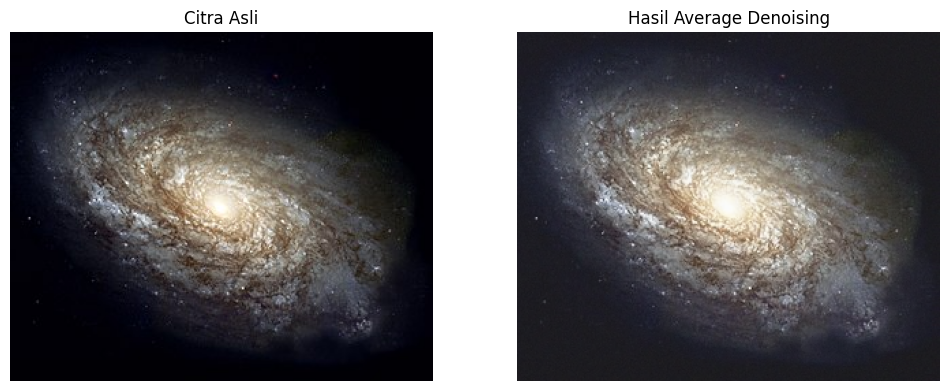

In [82]:
import cv2 as cv
import numpy as np
import glob
import pandas as pd
import matplotlib.pyplot as plt

def calculate_mse(image1, image2):
    # Menghitung Mean Squared Error (MSE)
    mse = np.mean((image1 - image2) ** 2)
    return mse

def calculate_psnr(original_image, denoised_image):
    # Menghitung PSNR
    mse = calculate_mse(original_image, denoised_image)
    if mse == 0:
        return float('inf')  # Tidak ada perbedaan antara citra
    max_pixel = 255.0
    psnr = 10 * np.log10((max_pixel ** 2) / mse)
    return psnr

# Membaca citra asli
original_image = cv.imread('/content/drive/MyDrive/PCVK/Images/Assets/galaxy.jpg')

# Memuat semua citra dengan Gaussian Noise dari folder
noisy_images = []
for img_path in glob.glob('/content/drive/MyDrive/PCVK/Images/Assets/noises/*.jpg'):
    noisy_image = cv.imread(img_path)
    noisy_images.append(noisy_image)

# Input jumlah citra yang di-average dari pengguna
num_images_to_average = int(input("Masukkan jumlah citra yang akan di-average: "))

# Pastikan jumlah citra yang diminta tidak melebihi jumlah citra yang tersedia
num_images_to_average = min(num_images_to_average, len(noisy_images))

# Lakukan average denoising
avg_image = np.zeros_like(noisy_images[0], dtype=np.float32)
for i in range(num_images_to_average):
    avg_image += noisy_images[i].astype(np.float32)
avg_image /= num_images_to_average
avg_image = np.clip(avg_image, 0, 255).astype(np.uint8)

# Hitung PSNR antara citra asli dan citra hasil average denoising
psnr_value = calculate_psnr(original_image, avg_image)

# Catat hasil PSNR ke dalam tabel
results_df = pd.DataFrame({
    'No': [1],
    'Jumlah Citra di Average': [num_images_to_average],
    'Image Hasil Nilai PSNR (dB)': [psnr_value]
})

# Simpan DataFrame ke file CSV
results_df.to_csv('/content/drive/MyDrive/PCVK/Images/Assets/psnr_results.csv', index=False)

print("Hasil PSNR telah disimpan ke file CSV.")
print(f"Jumlah citra yang di-average: {num_images_to_average}")
print(f"Nilai PSNR (dB): {psnr_value:.2f}")

# Menarik kesimpulan
if psnr_value > 30:
    print("Kesimpulan: Citra hasil denoising memiliki kualitas yang baik.")
elif psnr_value > 20:
    print("Kesimpulan: Citra hasil denoising memiliki kualitas yang cukup baik.")
else:
    print("Kesimpulan: Citra hasil denoising memiliki kualitas yang kurang baik.")

# Tampilkan gambar asli dan hasil denoising
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title('Citra Asli')
plt.imshow(cv.cvtColor(original_image, cv.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Hasil Average Denoising')
plt.imshow(cv.cvtColor(avg_image, cv.COLOR_BGR2RGB))
plt.axis('off')

plt.show()


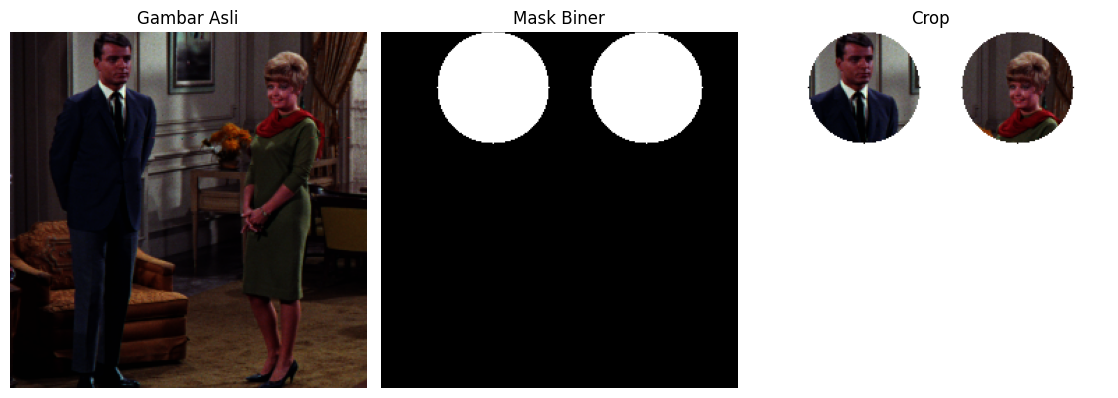

In [74]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Membaca gambar asli (couple.tiff)
gambar_asli = cv2.imread('/content/drive/MyDrive/PCVK/Images/Assets/couple.tiff')

# Mengubah gambar dari BGR ke RGB untuk ditampilkan dengan matplotlib
gambar_asli_rgb = cv2.cvtColor(gambar_asli, cv2.COLOR_BGR2RGB)

# Membuat mask biner dengan dua lingkaran pada posisi yang berbeda
mask = np.zeros(gambar_asli.shape[:2], dtype="uint8")

# Menggambar dua lingkaran pada mask (dua area mask)
cv2.circle(mask, (80, 40), 40, 255, -1)  # Lingkaran pertama di koordinat (80, 40)
cv2.circle(mask, (190, 40), 40, 255, -1)  # Lingkaran kedua di koordinat (190, 40)


# Membuat inverse mask
mask_inverse = cv2.bitwise_not(mask)

# Mengambil area foreground dari gambar asli
foreground = cv2.bitwise_and(gambar_asli, gambar_asli, mask=mask)

# Membuat background hitam dengan mask inverse
background = cv2.bitwise_and(gambar_asli, gambar_asli, mask=mask_inverse)

# Menampilkan gambar asli, mask, dan hasil masking
plt.figure(figsize=(15, 5))

# Gambar Asli
plt.subplot(1, 4, 1)
plt.imshow(gambar_asli_rgb)
plt.title('Gambar Asli')
plt.axis('off')

# Mask Biner (hitam-putih)
plt.subplot(1, 4, 2)
plt.imshow(mask, cmap='gray')
plt.title('Mask Biner')
plt.axis('off')

# Hasil Masking Lingkaran 1
# Ubah area hitam (nilai 0) menjadi putih (nilai 255)
lingkaran1 = cv2.cvtColor(foreground, cv2.COLOR_BGR2RGB)
lingkaran1[lingkaran1 == 0] = 255

# Menampilkan lingkaran dengan background putih
plt.subplot(1, 4, 3)
plt.imshow(lingkaran1)
plt.title('Crop')
plt.axis('off')


plt.tight_layout()
plt.show()

Masukkan operator biner (NOT, OR, AND, NAND, XOR): NOT


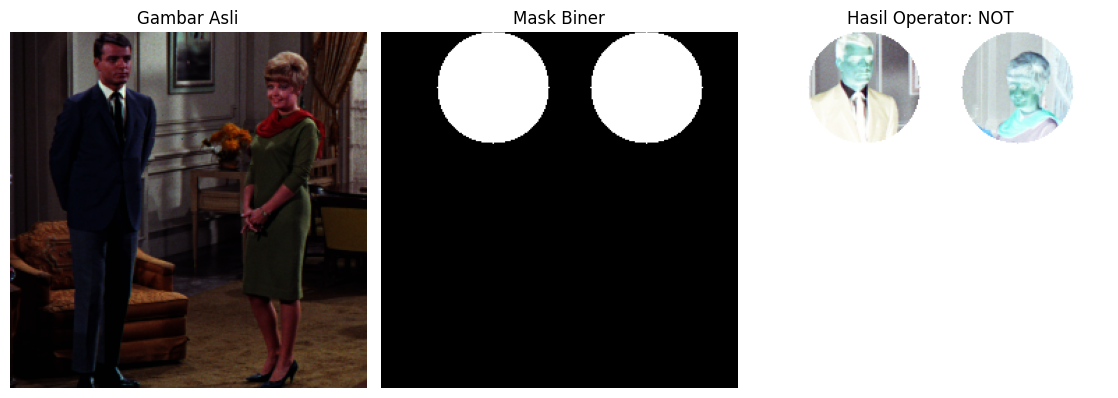

In [79]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Fungsi untuk menerapkan operator biner pada gambar
def apply_operator(operator, img1, img2):
    if operator == 'NOT':
        return cv2.bitwise_not(img1)
    elif operator == 'OR':
        return cv2.bitwise_or(img1, img2)
    elif operator == 'AND':
        return cv2.bitwise_and(img1, img2)
    elif operator == 'NAND':
        return cv2.bitwise_not(cv2.bitwise_and(img1, img2))
    elif operator == 'XOR':
        return cv2.bitwise_xor(img1, img2)
    else:
        print("Operator tidak valid!")
        return None

# Membaca gambar asli (couple.tiff)
gambar_asli = cv2.imread('/content/drive/MyDrive/PCVK/Images/Assets/couple.tiff')

# Mengubah gambar dari BGR ke RGB untuk ditampilkan dengan matplotlib
gambar_asli_rgb = cv2.cvtColor(gambar_asli, cv2.COLOR_BGR2RGB)

# Membuat mask biner dengan dua lingkaran pada posisi yang berbeda
mask = np.zeros(gambar_asli.shape[:2], dtype="uint8")
cv2.circle(mask, (80, 40), 40, 255, -1)  # Lingkaran pertama di koordinat (80, 40)
cv2.circle(mask, (190, 40), 40, 255, -1)  # Lingkaran kedua di koordinat (190, 40)

# Membuat inverse mask
mask_inverse = cv2.bitwise_not(mask)

# Mengambil area foreground dan background dari gambar asli
foreground = cv2.bitwise_and(gambar_asli, gambar_asli, mask=mask)
background = cv2.bitwise_and(gambar_asli, gambar_asli, mask=mask)

# Menerima input operator dari pengguna
operator = input("Masukkan operator biner (NOT, OR, AND, NAND, XOR): ").upper()

# Menerapkan operator biner yang dipilih
output_image = apply_operator(operator, foreground, background)

if output_image is not None:
    # Ubah gambar hasil dari BGR ke RGB untuk ditampilkan
    output_image_rgb = cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB)

    # Menampilkan gambar asli, mask, dan hasil dari operator yang dipilih
    plt.figure(figsize=(15, 5))

    # Gambar Asli
    plt.subplot(1, 4, 1)
    plt.imshow(gambar_asli_rgb)
    plt.title('Gambar Asli')
    plt.axis('off')

    # Mask Biner
    plt.subplot(1, 4, 2)
    plt.imshow(mask, cmap='gray')
    plt.title('Mask Biner')
    plt.axis('off')

    # Gambar Hasil Operator
    plt.subplot(1, 4, 3)
    plt.imshow(output_image_rgb)
    plt.title(f'Hasil Operator: {operator}')
    plt.axis('off')

    plt.tight_layout()
    plt.show()
else:
    print("Gagal memproses gambar dengan operator yang dipilih.")
